In [20]:
import ollama
import pandas as pd
df = pd.read_csv('300-noticias-v2-filtradas.csv')

In [23]:
for model in ['llama3:8b', 'phi3:14b', 'gemma2:27b', 'qwen2:7b', 'qwen:32b']:    
    df.at[0, 'Emb_' + model] = '[0.3,0.4,0.5]'
    for index, row in df.iterrows():
        df.at[index, 'Emb_' + model] = ollama.embeddings(model=model, prompt=row['Texto_Original'])['embedding']

/tmp/ipykernel_56684/2761276877.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.3,0.4,0.5]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[0, 'Emb_' + model] = '[0.3,0.4,0.5]'


/tmp/ipykernel_56684/1139005629.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


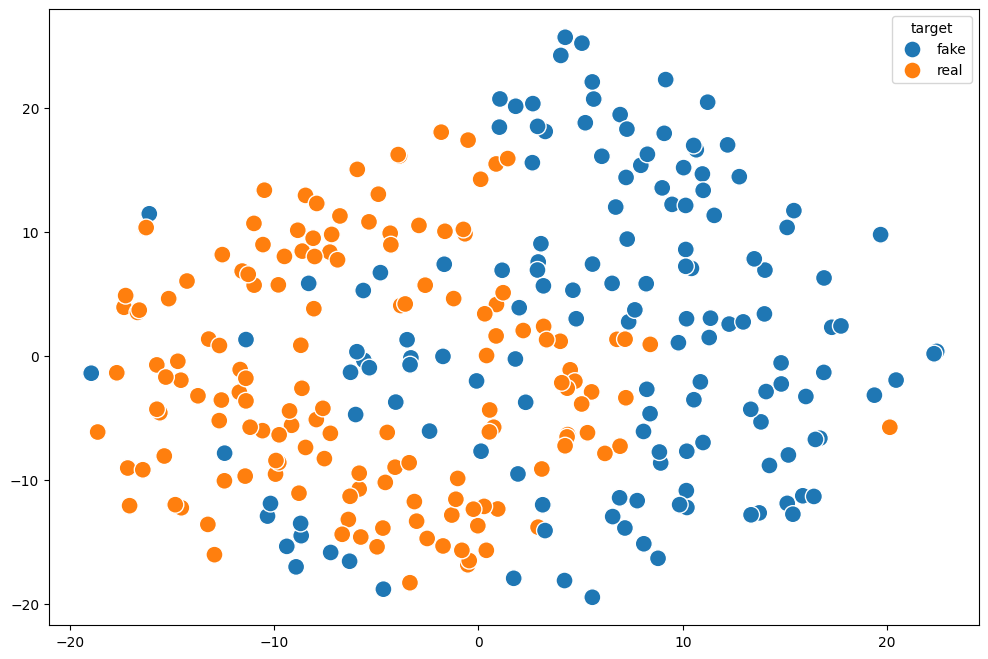

In [74]:
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

X_embedded = TSNE(n_components=2).fit_transform(np.array(df['Emb_openai'].to_list()))

cps_df = pd.DataFrame(X_embedded)

cps_df.loc[:, 'target'] = ['fake' if r['Rótulo'] == 'falso' else 'real' for _,r in df.iterrows()]

g = sns.scatterplot(x=0,y=1,data=cps_df, hue="target", legend=True, s=150)
g.set(xlabel=None)
g.set(ylabel=None)
g.figure.set_size_inches(12, 8)
fig = g.get_figure()
fig.show()

In [72]:
import openai

openai.api_key = ""

def get_embedding(text_to_embed):
	# Embed a line of text
	response = openai.Embedding.create(
    	model= "text-embedding-3-large",
    	input=[text_to_embed]
	)
	# Extract the AI output embedding as a list of floats
	embedding = response["data"][0]["embedding"]
    
	return embedding

In [73]:
df.at[0, 'Emb_openai'] = 'test'
for index, row in df.iterrows():
    df.at[index, 'Emb_openai'] = get_embedding(row['Texto_Original'])